#Get the data
The images we're working with are from the Food101 dataset (101 differnt classes of food) : https://www.kaggle.com/datasets/dansbecker/food-101

However we've modify it to only use two classes (pizza and steak) usin the image data modification notebook https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note** We start with a smaller dataset so we can figure out quickly what works and what does not before scaling up.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-06-12 12:19:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 172.253.118.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  24.0MB/s    in 5.6s    

2023-06-12 12:19:50 (18.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

#walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

# Visualize Images

To Visualize images, first lets get the class names programmatically

In [ ]:
#Get classnames programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
#lets visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"image shape: {img.shape}")

  return img

['3807440.jpg']
image shape: (512, 512, 3)


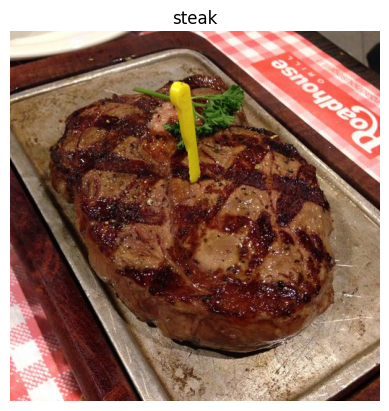

In [ ]:
#view random image from the training dataset

img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[209, 193, 177],
        [207, 191, 175],
        [207, 191, 175],
        ...,
        [115,  99,  83],
        [116, 100,  84],
        [117, 101,  85]],

       [[209, 193, 177],
        [207, 191, 175],
        [207, 191, 175],
        ...,
        [114,  98,  82],
        [114,  98,  82],
        [114,  98,  82]],

       [[209, 193, 177],
        [207, 191, 175],
        [208, 192, 176],
        ...,
        [113,  97,  81],
        [112,  96,  80],
        [112,  96,  80]],

       ...,

       [[250, 116, 107],
        [252, 117, 111],
        [251, 118, 113],
        ...,
        [ 87,  36,  35],
        [ 91,  40,  39],
        [ 94,  43,  42]],

       [[254, 121, 112],
        [251, 118, 111],
        [247, 114, 109],
        ...,
        [ 87,  36,  35],
        [ 89,  37,  39],
        [ 89,  37,  39]],

       [[255, 125, 118],
        [247, 114, 107],
        [241, 109, 104],
        ...,
        [ 90,  39,  3

In [ ]:
#view the image shape
img.shape

(512, 512, 3)

In [ ]:
img/225

array([[[0.92888889, 0.85777778, 0.78666667],
        [0.92      , 0.84888889, 0.77777778],
        [0.92      , 0.84888889, 0.77777778],
        ...,
        [0.51111111, 0.44      , 0.36888889],
        [0.51555556, 0.44444444, 0.37333333],
        [0.52      , 0.44888889, 0.37777778]],

       [[0.92888889, 0.85777778, 0.78666667],
        [0.92      , 0.84888889, 0.77777778],
        [0.92      , 0.84888889, 0.77777778],
        ...,
        [0.50666667, 0.43555556, 0.36444444],
        [0.50666667, 0.43555556, 0.36444444],
        [0.50666667, 0.43555556, 0.36444444]],

       [[0.92888889, 0.85777778, 0.78666667],
        [0.92      , 0.84888889, 0.77777778],
        [0.92444444, 0.85333333, 0.78222222],
        ...,
        [0.50222222, 0.43111111, 0.36      ],
        [0.49777778, 0.42666667, 0.35555556],
        [0.49777778, 0.42666667, 0.35555556]],

       ...,

       [[1.11111111, 0.51555556, 0.47555556],
        [1.12      , 0.52      , 0.49333333],
        [1.11555556, 0

##Steps

* Load our Images
* Preprocess our Images
* Build a CNN to find patterns in our Images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data (get all of the pixel values between 0 & 1, )
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup path to our directory
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            seed=42)

#Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 28s 351ms/step - loss: 0.6867 - accuracy: 0.5513 - val_loss: 0.6457 - val_accuracy: 0.5600
Epoch 2/5
47/47 [==============================] - 11s 231ms/step - loss: 0.5306 - accuracy: 0.7453 - val_loss: 0.4142 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4623 - accuracy: 0.8027 - val_loss: 0.4172 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4342 - accuracy: 0.8100 - val_loss: 0.3797 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.3943 - accuracy: 0.8280 - val_loss: 0.4367 - val_accuracy: 0.8000


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

#Binary Classification: Lets break it down

### Preprocessing the data (prepare if for a model)

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

### The next thing is to turn the data into batches
* A batch is a small subset of data. Rather than look at all the data. Rather than look at all, a model might only look at 32 at a time

####ImageDataGenerator would turn the tensor into image input and theb automatically rescale it

# Next is to Create a CNN Nodel
## * Start a Baseline

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [ ]:
model_3 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)), #input layer(specify input shape)
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") #Output Layer (using sigmoid cos we are working with binary data, so only 1 output neuron)
])

* Filters decide how many filters should pass over an imput tensor
* Kernel_size determines the shape of the filters over the output
* Pads the target tensor with zeros(same or valid)
* Strides is the number of steps a filter takes accross an image at a time

In [ ]:
#compile the model
model_3.compile(loss = "binary_crossentropy",
                 optimizer=Adam(),
                 metrics= ["accuracy"])

In [ ]:
# Get a summary of our model
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


Fit the model

In [ ]:
#check the lengths the training and test data generators
len(train_data), len(valid_data)

(47, 16)

In [ ]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 94s 2s/step - loss: 0.9068 - accuracy: 0.6233 - val_loss: 0.5095 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 93s 2s/step - loss: 0.4530 - accuracy: 0.8053 - val_loss: 0.4234 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 92s 2s/step - loss: 0.2803 - accuracy: 0.8967 - val_loss: 0.4326 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 95s 2s/step - loss: 0.1216 - accuracy: 0.9693 - val_loss: 0.4691 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 93s 2s/step - loss: 0.0451 - accuracy: 0.9940 - val_loss: 0.5364 - val_accuracy: 0.8080


### Evaluating our model

<Axes: >

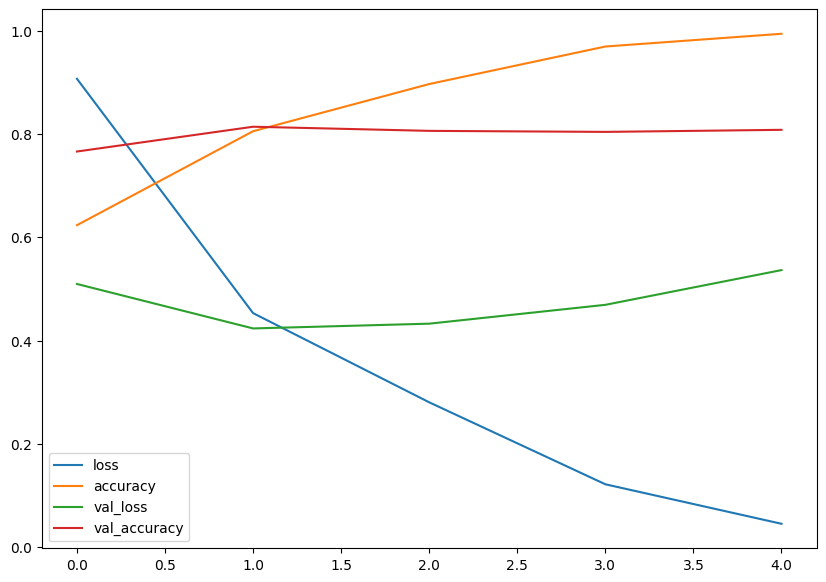

In [ ]:
import pandas as pd
pd.DataFrame(history_3.history).plot(figsize=(10,7))

In [ ]:
#plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns Seperate loss Curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

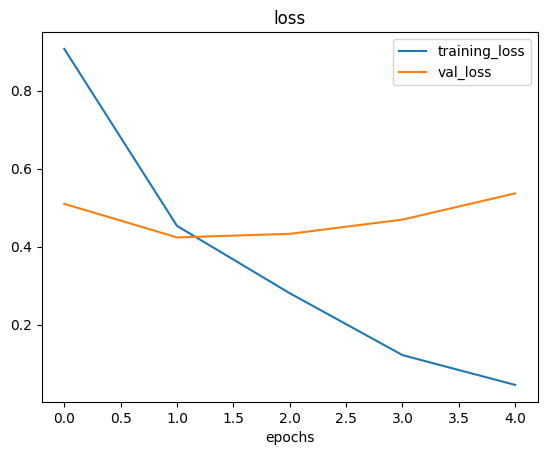

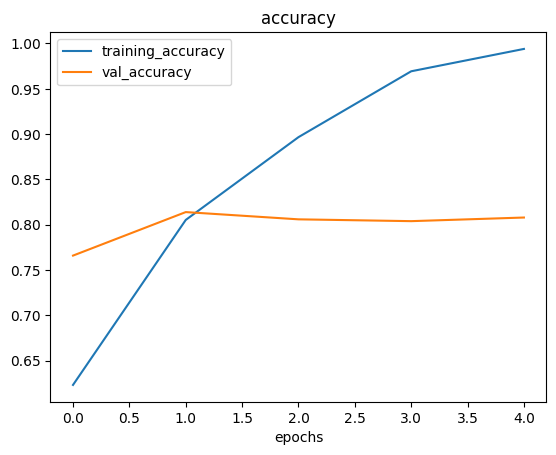

In [ ]:
#check out the loss and accuracy of model_3
plot_loss_curves(history_3)

### when validation loss starts to increase, its likely the model is **Overfitting** the training dataset

# Adjust the model parameters

Fitting a ML nodel comes in 3 steps

* Create a baseline
* Beat the baseline by overfitting a larger model
* Reduce Overfitting

Ways to induce Overfiting:

1. Increase the number of conv layers
2. Increase the number of conv filters
3. Add another dense layer to the output of our flattened layer

Reduce Overfitting:
1. Add data augmentation
2. Add regularisation layers (such as MaxPool2D
3. Add more data

In [ ]:
# Create the model ( this is going to be our new baseline)
model_4 = Sequential([
    Conv2D(10,3,activation = "relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 45s 955ms/step - loss: 0.6193 - accuracy: 0.6540 - val_loss: 0.4588 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 45s 956ms/step - loss: 0.4391 - accuracy: 0.8007 - val_loss: 0.3636 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 55s 1s/step - loss: 0.4238 - accuracy: 0.8187 - val_loss: 0.3735 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 53s 1s/step - loss: 0.3810 - accuracy: 0.8340 - val_loss: 0.3065 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 47s 1s/step - loss: 0.3524 - accuracy: 0.8547 - val_loss: 0.2849 - val_accuracy: 0.9000


In [ ]:
#summary of our model with maxpooling
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

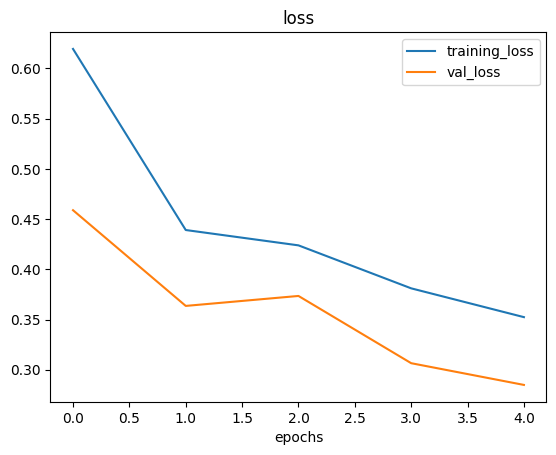

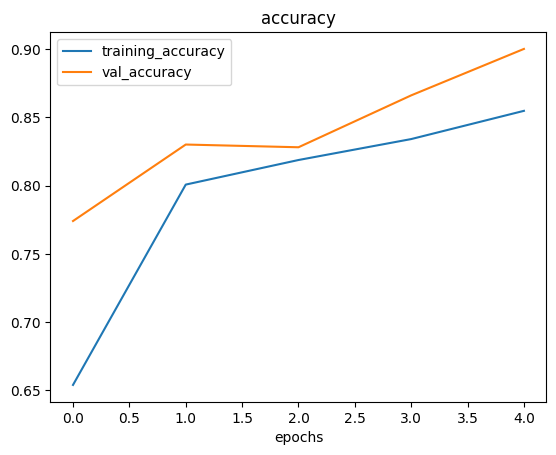

In [ ]:
plot_loss_curves(history_4)

## MaxPooling condense the layer to a smaller space. Now from the loss curve the training loss is reducing showing that the model overfitting has been reduced. Reducing overfitting is also called **Regularization**

### Data Augumentation

In [ ]:
#create ImageDataGenerator training instance with data augumentation
train_datagen_augumented = ImageDataGenerator(rescale=1/225.,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.3,
                                              horizontal_flip=True)

#Create imagedatagenerator without data augumentation
train_datagen = ImageDataGenerator(rescale=1/225.)

#Create ImageDataGenerator without data augumentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

## Data Augumentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizing(hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar

In [ ]:
# Import data and augument it from training directory

print("Augumented training data")
train_data_augumented = train_datagen_augumented.flow_from_directory(train_dir,
                                                          target_size=(224,224),
                                                          batch_size=32,
                                                          class_mode= "binary",
                                                          shuffle=True) # for demonstration purposes only

#Create non- augumented train data batched
print("non- augumented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=True)

#Create non- augumented test data
print("Non-augumented data")
test_data = valid_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary")

Augumented training data
Found 1500 images belonging to 2 classes.
non- augumented training data
Found 1500 images belonging to 2 classes.
Non-augumented data
Found 500 images belonging to 2 classes.


## Data augumentation is usually only perfomed on the training data

In [ ]:
# Get sample augumented data batches
images, labels = train_data.next()
augumented_images, augumented_labels = train_data_augumented.next() # Note: labels arent augumented ...only images

showing image number: 9


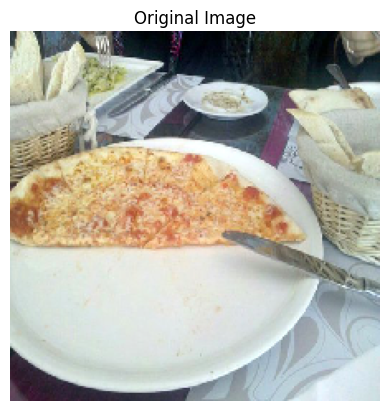

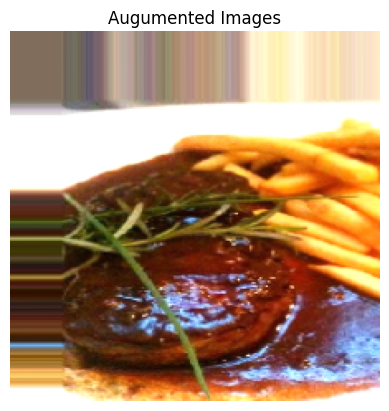

In [ ]:
#show the original image and augumented image
import random
random_number = random.randint(0,32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augumented_images[random_number])
plt.title(f"Augumented Images")
plt.axis(False);

In [ ]:
#Train a model that learns from augumented data
model_5 = Sequential([
    Conv2D(10,3, activation = "relu", input_shape = (225,225,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation= "sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data_augumented,
                        epochs=5,
                        validation_data = valid_data,
                        steps_per_epoch=len(train_data_augumented),
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 69s 1s/step - loss: 0.6288 - accuracy: 0.6220 - val_loss: 0.4867 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 63s 1s/step - loss: 0.5628 - accuracy: 0.7193 - val_loss: 0.4310 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 72s 2s/step - loss: 0.5267 - accuracy: 0.7580 - val_loss: 0.4360 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 51s 1s/step - loss: 0.4936 - accuracy: 0.7633 - val_loss: 0.3615 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 72s 2s/step - loss: 0.4726 - accuracy: 0.7780 - val_loss: 0.5002 - val_accuracy: 0.7500


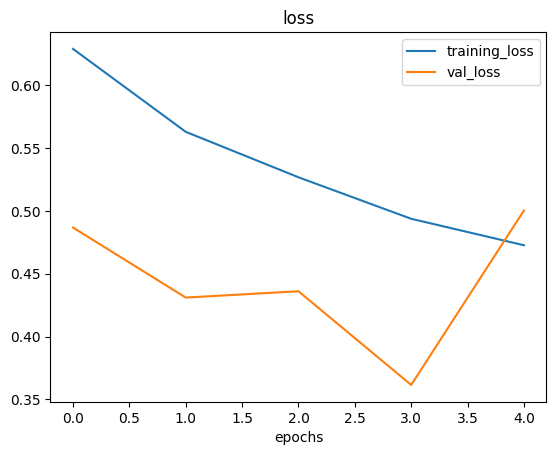

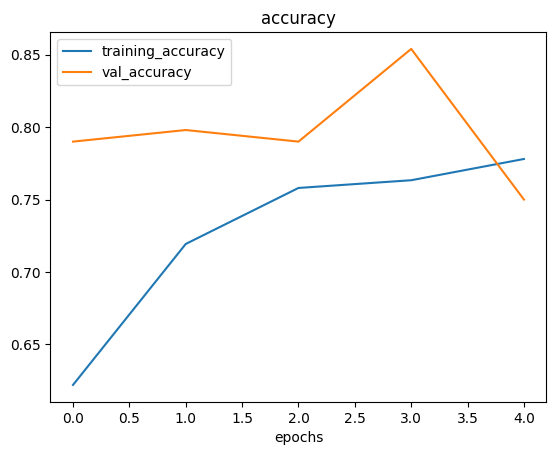

In [ ]:
#Check model training curves
plot_loss_curves(history_5)

### * Repeat Until Satisfied

In [ ]:
model_6 = Sequential([
    Conv2D(20,3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(20,3, activation= "relu"),
    MaxPool2D(),
    Conv2D(20,3, activation= "relu"),
    MaxPool2D(),
    Conv2D(20,3, activation= "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augumented,
                        epochs=10,
                        validation_data = valid_data,
                        steps_per_epoch=len(train_data_augumented),
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 31s 582ms/step - loss: 0.6864 - accuracy: 0.5573 - val_loss: 0.6062 - val_accuracy: 0.6820
Epoch 2/10
47/47 [==============================] - 25s 543ms/step - loss: 0.5891 - accuracy: 0.6913 - val_loss: 0.5275 - val_accuracy: 0.7320
Epoch 3/10
47/47 [==============================] - 25s 537ms/step - loss: 0.5329 - accuracy: 0.7467 - val_loss: 0.3719 - val_accuracy: 0.8560
Epoch 4/10
47/47 [==============================] - 25s 541ms/step - loss: 0.4953 - accuracy: 0.7533 - val_loss: 0.3431 - val_accuracy: 0.8620
Epoch 5/10
47/47 [==============================] - 25s 535ms/step - loss: 0.4622 - accuracy: 0.8000 - val_loss: 0.3598 - val_accuracy: 0.8600
Epoch 6/10
47/47 [==============================] - 25s 537ms/step - loss: 0.4519 - accuracy: 0.7913 - val_loss: 0.3490 - val_accuracy: 0.8820
Epoch 7/10
47/47 [==============================] - 25s 533ms/step - loss: 0.4306 - accuracy: 0.8147 - val_loss: 0.4475 - val_accuracy: 0.8020

# Making a Prediction with our trained model on our own custom data

In [ ]:
print(class_names)

['pizza' 'steak']


--2023-06-12 12:27:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2023-06-12 12:27:30 (240 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



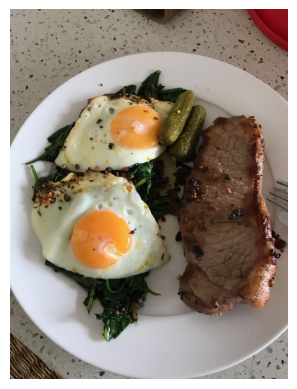

In [ ]:
#view our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
#check the shape
steak.shape

(4032, 3024, 3)

In [ ]:
#create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename,img_shape=224):
  #Read in the image
  img=tf.io.read_file(filename)
  #Decode the readfile into a tensor
  img = tf.image.decode_image(img)
  #resize the image
  img = tf.image.resize(img, size=[img_shape,img_shape])
  #Rescale the image(between 0 and 1)
  img = img/255.
  return img

In [ ]:
#Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_6.predict(tf.expand_dims(steak, axis = 0))

1/1 [==============================] - 0s 229ms/step


In [ ]:
#  We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  #import the target image and process  it
  img = load_and_prep_image(filename)
  pred=model.predict(tf.expand_dims(img, axis = 0))

  pred_class = class_names[int(tf.round(pred))]

  #plot the image and the predicted classs
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 22ms/step


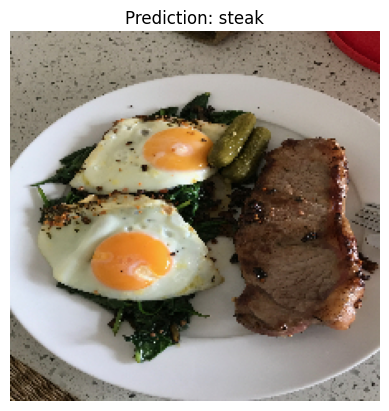

In [ ]:
pred_and_plot(model_6, "03-steak.jpeg")

### Our model works, lets try it on another image

--2023-06-12 12:40:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2023-06-12 12:40:52 (147 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 38ms/step


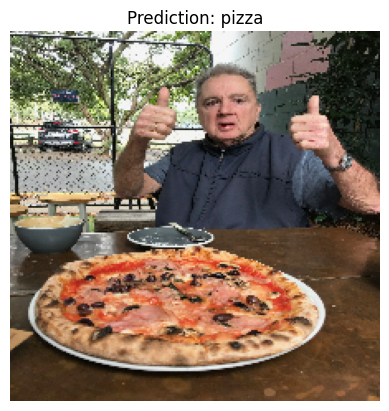

In [ ]:
#Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_6,"03-pizza-dad.jpeg")